<a href="https://colab.research.google.com/github/AbhJ/Genetic-Algorithm-Term-Project/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter number of locations (0 - 20) in integer form: 20
Enter crossover rate (0 - 1) in floating point form: 0.3
Enter mutation rate (0 - 1) in floating point form: 0.05
Enter number of generations (0 - 100) in integer form: 60
Generation index: 0 | best fit: 166.84


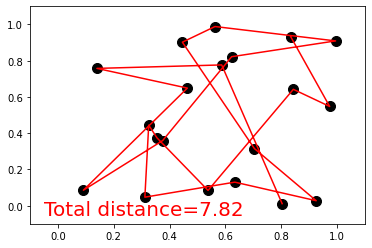

Generation index: 1 | best fit: 178.92


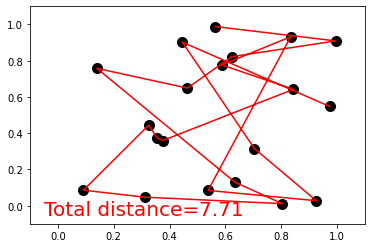

Generation index: 2 | best fit: 178.92


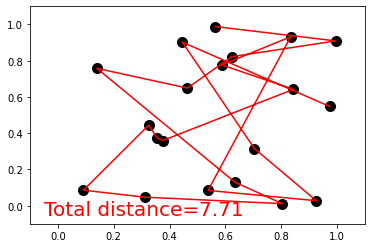

Generation index: 3 | best fit: 270.20


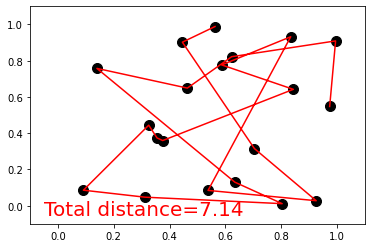

Generation index: 4 | best fit: 270.20


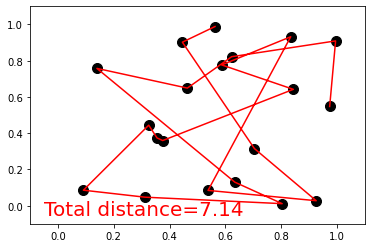

Generation index: 5 | best fit: 354.47


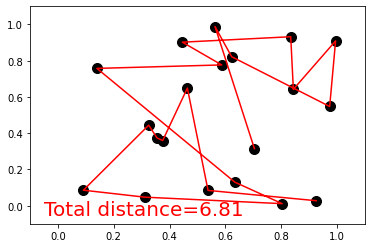

Generation index: 6 | best fit: 354.47


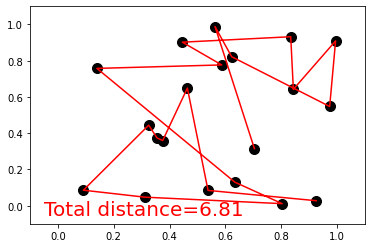

Generation index: 7 | best fit: 354.47


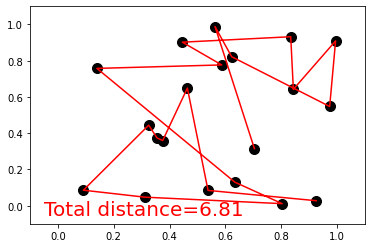

Generation index: 8 | best fit: 354.47


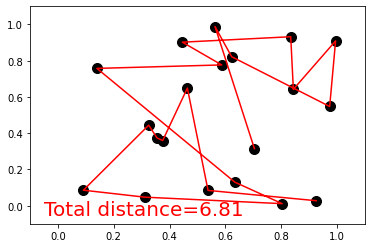

Generation index: 9 | best fit: 354.47


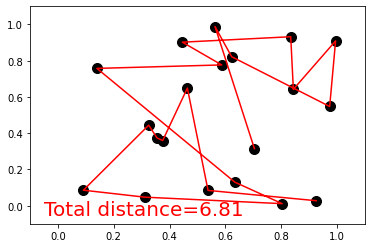

Generation index: 10 | best fit: 444.05


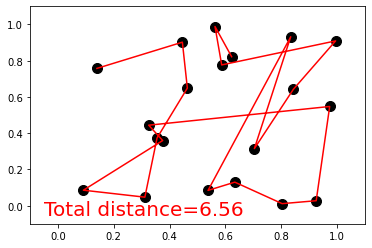

Generation index: 11 | best fit: 716.45


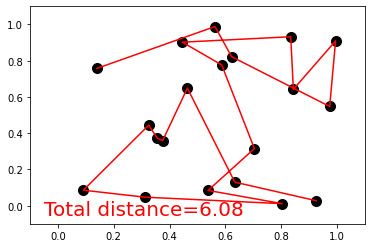

Generation index: 12 | best fit: 910.78


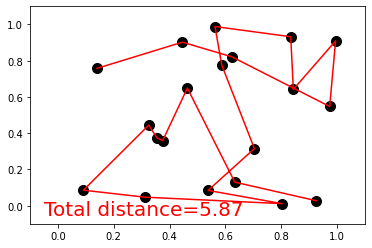

Generation index: 13 | best fit: 887.71


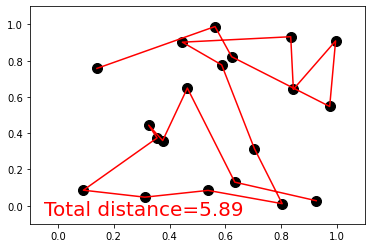

Generation index: 14 | best fit: 716.45


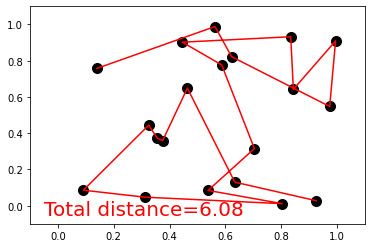

Generation index: 15 | best fit: 716.45


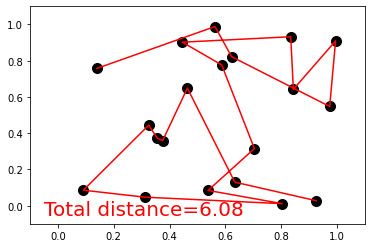

Generation index: 16 | best fit: 905.68


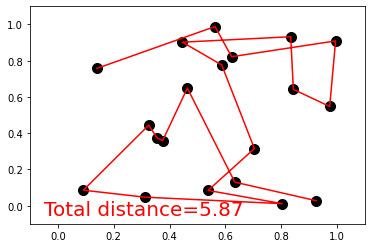

Generation index: 17 | best fit: 1047.94


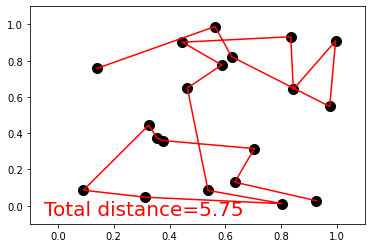

Generation index: 18 | best fit: 1047.94


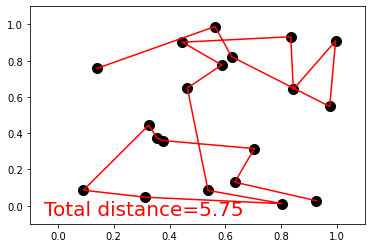

Generation index: 19 | best fit: 1239.79


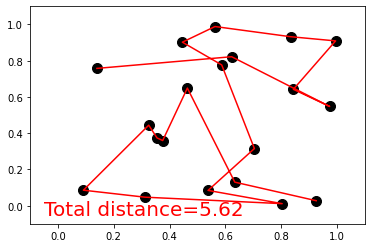

Generation index: 20 | best fit: 1239.79


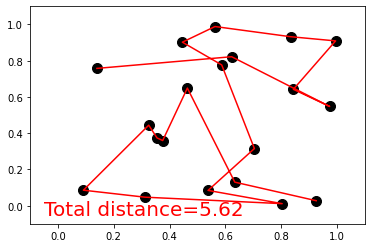

Generation index: 21 | best fit: 1645.29


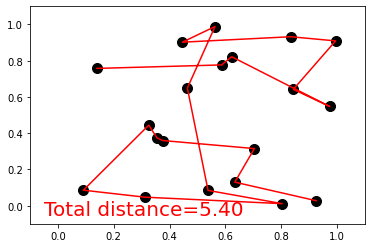

Generation index: 22 | best fit: 1321.09


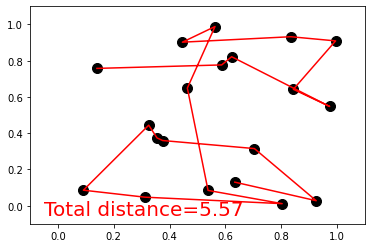

Generation index: 23 | best fit: 1321.09


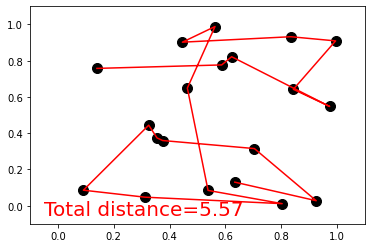

Generation index: 24 | best fit: 1321.09


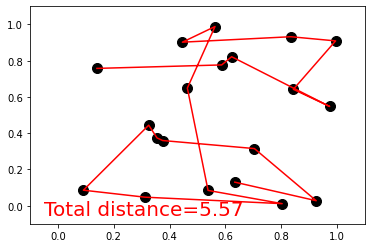

Generation index: 25 | best fit: 2752.75


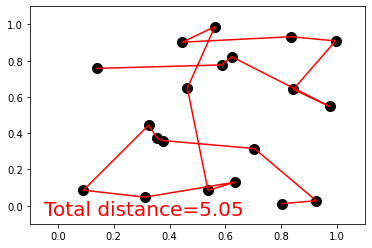

Generation index: 26 | best fit: 2752.75


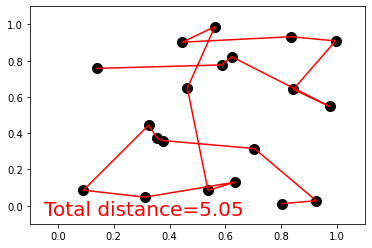

Generation index: 27 | best fit: 2752.75


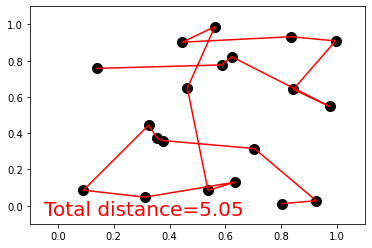

Generation index: 28 | best fit: 2752.75


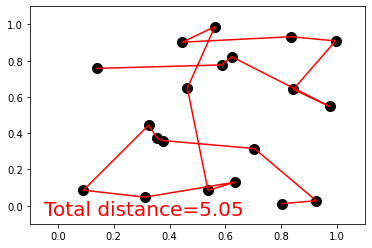

Generation index: 29 | best fit: 2752.75


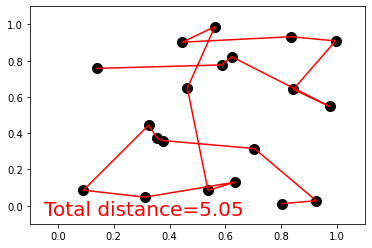

Generation index: 30 | best fit: 3124.03


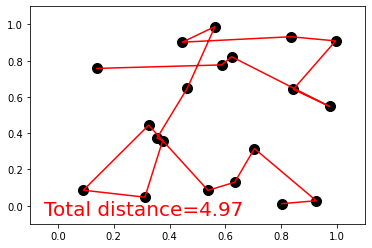

Generation index: 31 | best fit: 3124.03


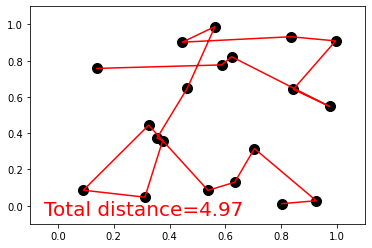

Generation index: 32 | best fit: 3259.42


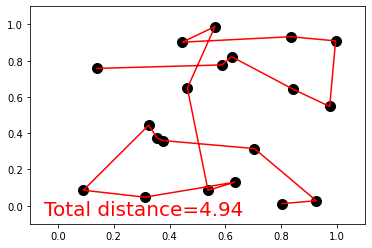

Generation index: 33 | best fit: 3259.42


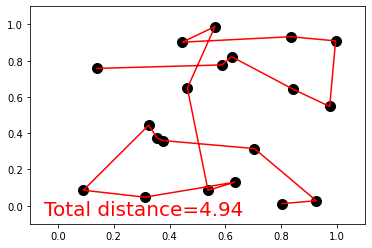

Generation index: 34 | best fit: 3616.12


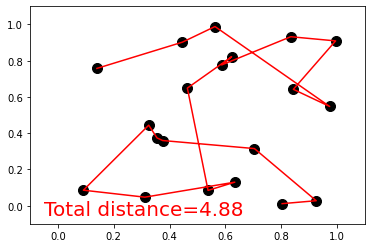

Generation index: 35 | best fit: 3616.12


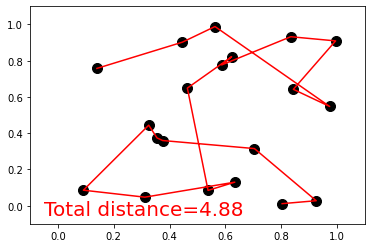

Generation index: 36 | best fit: 3894.92


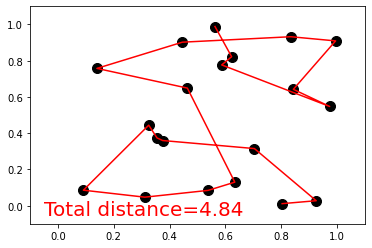

Generation index: 37 | best fit: 3896.02


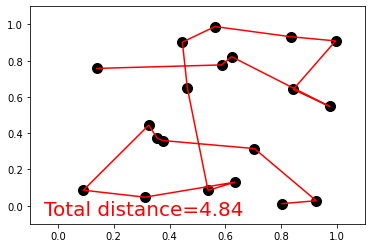

Generation index: 38 | best fit: 3894.92


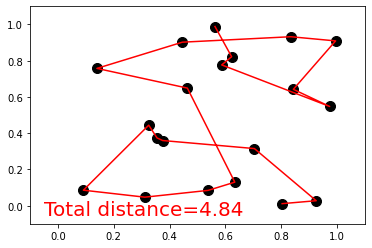

Generation index: 39 | best fit: 3894.92


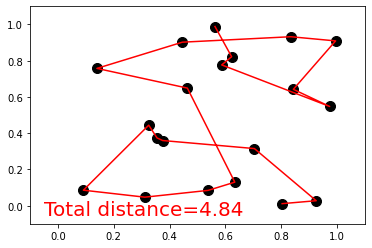

Generation index: 40 | best fit: 3894.92


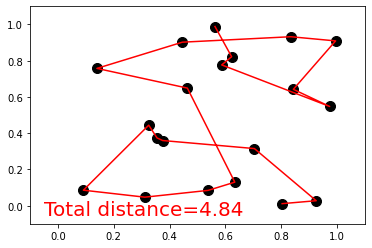

Generation index: 41 | best fit: 3894.92


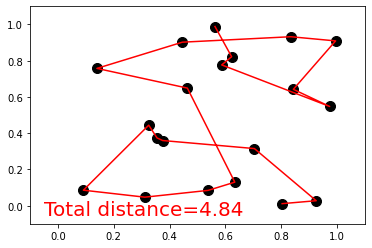

Generation index: 42 | best fit: 3894.92


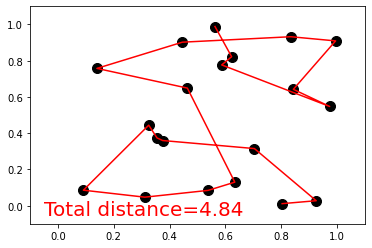

Generation index: 43 | best fit: 3894.92


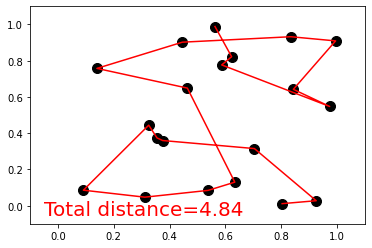

Generation index: 44 | best fit: 3894.92


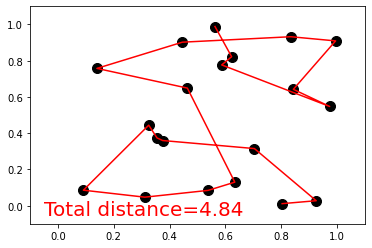

Generation index: 45 | best fit: 3894.92


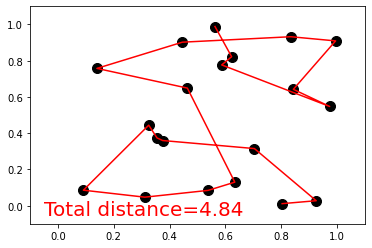

Generation index: 46 | best fit: 3894.92


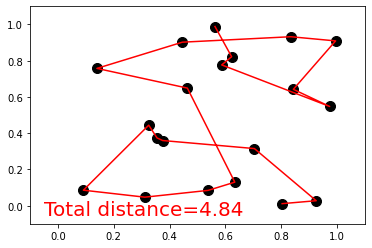

Generation index: 47 | best fit: 3894.92


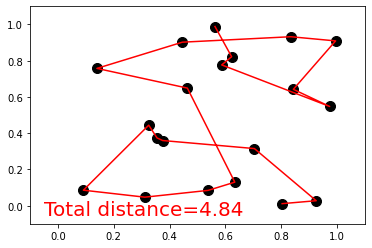

Generation index: 48 | best fit: 3894.92


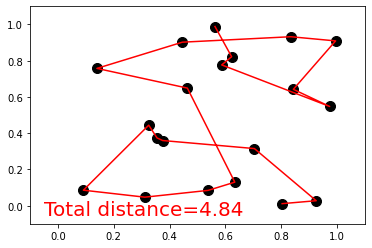

Generation index: 49 | best fit: 3894.92


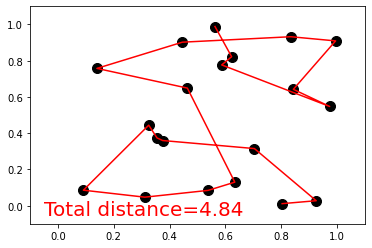

Generation index: 50 | best fit: 3894.92


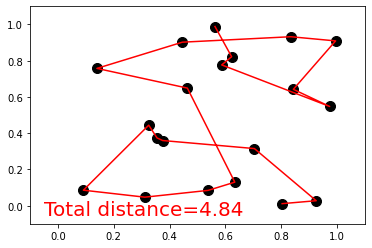

Generation index: 51 | best fit: 3894.92


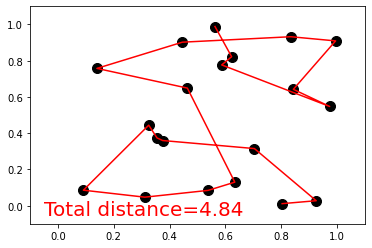

Generation index: 52 | best fit: 3921.52


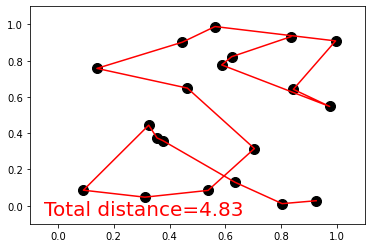

Generation index: 53 | best fit: 4003.42


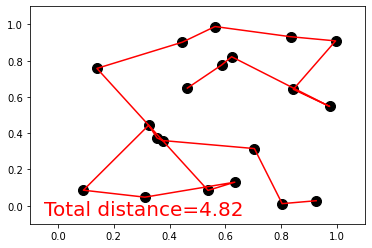

Generation index: 54 | best fit: 4675.04


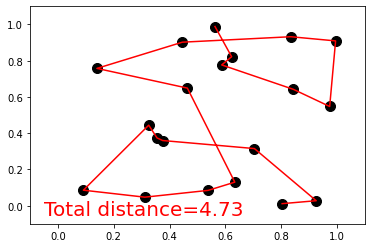

Generation index: 55 | best fit: 4675.04


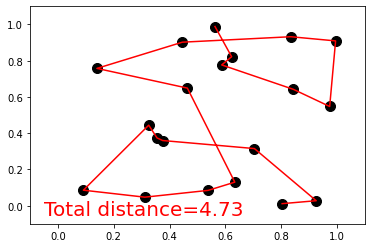

Generation index: 56 | best fit: 5263.08


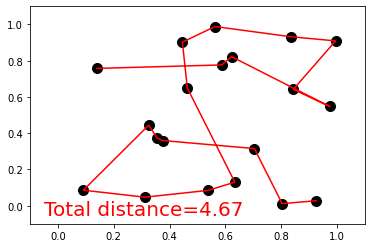

Generation index: 57 | best fit: 5833.79


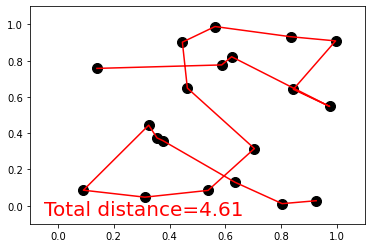

Generation index: 58 | best fit: 5833.79


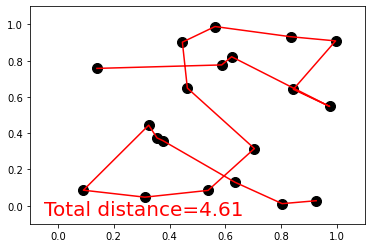

Generation index: 59 | best fit: 5833.79


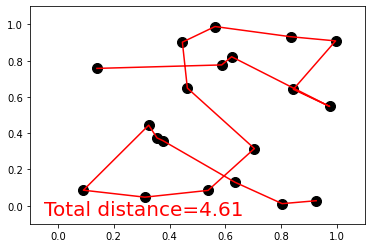

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# in TSP graph is complete
location_count = 20  # count of locations
crossover_rate = 0.1 # cross over rate
mutation_rate = 0.02 # mutation rate
generation_count = 500 # number of generations


class GA(object):
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size
        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])

    def translateDNA(self, DNA, city_position):
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(bool)   # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child


class ready_for_TSP(object):
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2)
        plt.ion()

    def printer_function(self, lx, ly, total_d):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.pause(0.01)
location_count = int(input("Enter number of locations (0 - 20) in integer form: "))
crossover_rate = float(input("Enter crossover rate (0 - 1) in floating point form: "))
mutation_rate = float(input("Enter mutation rate (0 - 1) in floating point form: "))
generation_count = int(input("Enter number of generations (0 - 100) in integer form: "))
ga = GA(DNA_size=location_count, cross_rate=crossover_rate, mutation_rate=mutation_rate, pop_size=500)
env = ready_for_TSP(location_count)
for generation in range(generation_count):
    lx, ly = ga.translateDNA(ga.pop, env.city_position)
    fitness, total_distance = ga.get_fitness(lx, ly)
    ga.evolve(fitness)
    best_idx = np.argmax(fitness)
    print('Generation index:', generation, '| best fit: %.2f' % fitness[best_idx])
    env.printer_function(lx[best_idx], ly[best_idx], total_distance[best_idx])


plt.ioff()
plt.show()